In [2]:
import numpy as np
import pandas as pd
import pygmt
import os
# ------------------------ function use in calculation ---------------------------------
def dist2Dsimple(minlong,maxlong,minlat,maxlat):
    '''
    assumed the area is plain, and 1 degree = 111320 m
    '''
    deg_to_m = 111320
    # convert to numeric 
    minlong = np.float64(minlong)
    maxlong = np.float64(maxlong)
    minlat = np.float64(minlat)
    maxlat = np.float64(maxlat)
    #
    dist = np.sqrt(((maxlong - minlong )**2) + ((maxlat - minlat ) **2))* deg_to_m #
    return dist
def dist2d(long1, lat1,long2, lat2):
    from pyproj import Geod
    '''
    calculate the distance of 2 points
    '''
    # Define geodetic system (WGS84)
    geod = Geod(ellps='WGS84')
    _, _, dist = geod.inv(long1, lat1,long2, lat2)
    
    return dist
### ------------------- ###
def area_ha(minlong,maxlong,minlat,maxlat):
    import geopandas as gpd
    from shapely.geometry import Polygon
    # Define a list of (longitude, latitude) coordinates that form the boundary of the study area
    coords = [(minlong, minlat), (minlong, maxlat), (maxlong, maxlat), (maxlong, minlat)] 
    # Create a Polygon from the coordinates
    polygon = Polygon(coords)
    # Create a GeoDataFrame with WGS84 CRS (EPSG:3405)
    gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:6405", geometry=[polygon])
    # Reproject to a UTM projection for area calculation (adjust EPSG based on your location)
    gdf = gdf.to_crs(epsg=3405)  # UTM zone 48N for Vietnam
    # Calculate the area in square meters
    area_sq_meters = gdf.geometry.area[0]
    # Convert square meters to hectares (1 hectare = 10,000 square meters)
    area_hectares = area_sq_meters #/ 10000
    return area_hectares
### ------------------- ###
def area_ha_plain(minlong,minlat,maxlong,maxlat):
    '''
    assumed the area is plain, and 1 degree = 111320 m
    '''
    deg_to_m = 111320
    aream = ((maxlong - minlong ) * deg_to_m) * ((maxlat - minlat ) * deg_to_m) #
    area =  aream/10000 # 1 ha = 10000 meters
    return area
    
### ------------------- ###
def cal_body_cross_section(DBH):
    import numpy as np
    '''
    Calculate the speccy's cross-section diameter follow Curtis & Macintosh 1951
    '''
    DBH = np.float64(DBH)
    #
    G = (3.142 * (DHB**2))/40000
    return G
### ------------------- ###
def density(NoS,area):
    '''
    Calculate the density based on the data frame data (number of speccy over all number of species)
    '''
    #
    NoS = np.int(NoS);
    area = np.float64(area);
    #
    dens = NoS/area;
    #
    return dens
### ------------------- ###
def cal_sp_super():
    '''
    Calculate the species superiority index based on the density and body crosssection
    '''
    return IVI
# ---------------------------------------------------------------------------------------
pwd = os.getcwd()
# output directory already created in step 0
# read the data and kip 2 rows due to format error
data = pd.read_csv(os.path.join(pwd,"output","00_intitial_data.txt"), sep=',',
                   # names=["index","jk1","name","lat","long","code"],
                   header=0,
                  )
data
# # # Now calculate the area for study area based on the species coordinantes
cal_min_x=data['Longitude'].min()
cal_max_x=data['Longitude'].max()
cal_min_y=data['Latitude'].min()
cal_max_y=data['Latitude'].max()

# S = area_ha_plain(cal_min_x,cal_max_x,cal_min_y,cal_max_y)
# # --- > End section Preprocess the dataframe < --- #
# pre-condition for the data frame
source=[];  source_code=[]; site_code=[]; source_long=[]; source_lat=[]; source2x=[]; source2y=[];
soure_C=[]; soure_DBH=[]; soure_S=[]; soure_scode=[];
site=[]; site_long=[]; site_lat=[]; site2x=[]; site2y=[]; site_C=[]; site_DBH=[]; site_S=[]; site_scode=[];
distance=[];
# #
datanow = data.copy();
# datanow['sname'] = ['S' + str(i).zfill(4) for i in datanow.index]

# #
for i,sname in enumerate(datanow['sname']):
    print(sname)
    data_now = datanow[datanow['sname']!=sname]; 
    data_now.reset_index(drop=True,inplace=True);
    for j,sname0 in enumerate(data_now['sname']):
#         # print(i,sname,j,sname0)
#         #
        source = np.append(source,sname);
        site = np.append(site,sname0);
#         #
        source_code = np.append(source_code,data.loc[i,'Code'])
        source_long = np.append(source_long,data.loc[i,'Longitude'])
        source_lat = np.append(source_lat,data.loc[i,'Latitude'])
        soure_C = np.append(soure_C,data.loc[i,'C(cm)'])
        soure_DBH = np.append(soure_DBH,data.loc[i,'DBH(cm)'])
        soure_S = np.append(soure_S,data.loc[i,'S(m2)'])
        soure_scode = np.append(soure_scode,data.loc[i,'Code'])
        #
        site_code = np.append(site_code,data_now.loc[j,'Code'])
        site_long = np.append(site_long,data_now.loc[j,'Longitude'])
        site_lat = np.append(site_lat,data_now.loc[j,'Latitude'])
        site_C = np.append(site_C,data.loc[j,'C(cm)'])
        site_DBH = np.append(site_DBH,data.loc[j,'DBH(cm)'])
        site_S = np.append(site_S,data.loc[j,'S(m2)'])
        site_scode = np.append(site_scode,data.loc[j,'Code'])
        # source to x and source to y (to the reference point at x and y )
        source2x = np.append(source2x,datanow.loc[i,'d2x'])
        source2y = np.append(source2y,data_now.loc[i,'d2y'])
        # site to x and site to y (to the reference point at x and y )
        site2x = np.append(site2x,datanow.loc[j,'d2x'])
        site2y = np.append(site2y,data_now.loc[j,'d2y'])
        
        # calculate the distance
        dist_now = dist2d(data.loc[i,'Longitude'],data.loc[i,'Latitude'],data_now.loc[j,'Longitude'],data_now.loc[j,'Latitude'])
        distance = np.append(distance,dist_now)     
print("Process the loop finish, making the dataframe!")  
# # Combine the arrays into a 2D array (if needed)
data_out = np.column_stack((source, source_code, source_long, source_lat,source2x, source2y,
                            soure_C, soure_DBH, soure_S, soure_scode, 
                            site, site_code, site_long, site_lat, site2x, site2y, 
                            site_C,site_DBH,site_S,site_scode, distance))
# # Create the DataFrame and specify column names
dataout = pd.DataFrame(data_out, columns=['Source',  'Sourcecode', 'Sourcelong', 'Sourcelat', 'Source2x', 'Source2y',
                                          'source_C', 'source_DBH', 'source_S', 'source_spiccies_code',
                                          'Site', 'Sitecode', 'Sitelong', 'Sitelat', 'Site2x', 'Site2y',
                                          'site_C', 'site_DBH', 'site_S', 'site_spiccies_code',
                                          'Dist'])
print("Write the dataframe to file!")  
dataout.to_csv(os.path.join(pwd,"output","01_all_distances.txt"),index=False,sep=',',header=True,encoding='utf-8')
print("Process done!")        

Start time: Mon Jul 21 11:29:14 2025
End time: Mon Jul 21 11:29:35 2025
Total process time: 21.03 seconds
Process done!


In [1]:
import numpy as np
import pandas as pd
import pygmt
import os
from multiprocessing import Pool, cpu_count
import time
import sys
# ====================================================================================================================================
'''
Determine the species density, relative frequency (G), and Importance Value Index (IVI) for each type of plant recorded in the dataset.
'''
# ====================================================================================================================================
def area_ha(minlong, maxlong, minlat, maxlat):
    import geopandas as gpd
    from shapely.geometry import Polygon

    # Tạo polygon từ 4 điểm giới hạn
    coords = [(minlong, minlat), (minlong, maxlat), 
              (maxlong, maxlat), (maxlong, minlat)]
    polygon = Polygon(coords)

    # Khởi tạo GeoDataFrame với hệ quy chiếu WGS84
    gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])

    # Chuyển sang UTM zone 48N (phù hợp với Việt Nam) để tính diện tích
    gdf = gdf.to_crs(epsg=3405)  # EPSG:3405 là VN-2000 / UTM zone 48N

    # Diện tích theo mét vuông
    area_sq_meters = gdf.geometry.area.iloc[0]

    # Đổi sang ha (1 ha = 10,000 m2)
    area_hectares = area_sq_meters / 10000

    return area_hectares
    
def area(minlong, maxlong, minlat, maxlat):
    import geopandas as gpd
    from shapely.geometry import Polygon

    # Tạo polygon từ 4 điểm giới hạn
    coords = [(minlong, minlat), (minlong, maxlat), 
              (maxlong, maxlat), (maxlong, minlat)]
    polygon = Polygon(coords)

    # Khởi tạo GeoDataFrame với hệ quy chiếu WGS84
    gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])

    # Chuyển sang UTM zone 48N (phù hợp với Việt Nam) để tính diện tích
    gdf = gdf.to_crs(epsg=3405)  # EPSG:3405 là VN-2000 / UTM zone 48N

    # Diện tích theo mét vuông
    area_sq_meters = gdf.geometry.area.iloc[0]

    # Đổi sang ha (1 ha = 10,000 m2)
    area = area_sq_meters

    return area
# ====================================================================================================================================
pwd = os.getcwd()
#
infile = os.path.join(pwd,"output","01_all_distances.txt")
#
if not os.path.isfile(infile):
    raise FileNotFoundError("Required file not found: {}".format(infile))
data = pd.read_csv(infile,sep=",",header=0)
# Calculate the S and total density
xmin = data['source_long'].min();
xmax = data['source_long'].max();
ymin = data['source_lat'].min();
ymax = data['source_lat'].max();
# the area of the quarant
S = area_ha(xmin,xmax,ymin,ymax)
# the area of the quarant
Sm = area(xmin,xmax,ymin,ymax)
# speicy density
denall = len(data['source'].unique())/S; # equal to 100% density
# total DBH
DBH_all = (data.groupby('source', as_index=False)['soure_DBH'].first())['soure_DBH'].sum();
# stem cross-sectional area (G)
data['G'] = (np.pi * data['soure_DBH']*data['soure_DBH'])/200**2
# Total G
G_all = (data.groupby('source', as_index=False)['G'].first())['G'].sum();
# pre-condition the data
sourcecode = [];
N = [];
rel_N = [];
rel_G = [];
rel_IVI = [];
source_codes = [];
sourcelong = [];
sourcelat = [];
Area = [];
for i,scode in enumerate(data['source_code'].unique()):
# for i,scode in enumerate(['A1']):
    datanow=data[data['source_code'] == scode]; datanow.reset_index(drop=True,inplace=True)
    Nnow = len(datanow['source'].unique())/S # current density
    rel_Nnow = (Nnow/denall)*100 # relative density now
    rel_Gnow = ((datanow.groupby('source', as_index=False)['G'].first())['G'].sum()/G_all)*100 # relative G
    rel_IVInow = (rel_Nnow + rel_Gnow)/2
    # print(i,scode)
    # print(Nnow,rel_Nnow,rel_Gnow,rel_IVInow)
    # append the data
    sourcecode = np.append(sourcecode,scode);
    N = np.append(N,Nnow);
    Area = np.append(Area,Sm);
    rel_N = np.append(rel_N,rel_Nnow);
    rel_G = np.append(rel_G,rel_Gnow);
    rel_IVI = np.append(rel_IVI,rel_IVInow);
    sourcelong = np.append(sourcelong,datanow['source_long'][i]);
    sourcelat = np.append(sourcelat,datanow['source_lat'][i]);
dataIVI = pd.DataFrame({
    'sourcecode' : sourcecode,
    'sourcelong' : sourcelong,
    'sourcelat' : sourcelat,
    'Area' : Area,
    'N' : N,
    'N%' : rel_N,
    'G%' : rel_G,
    'IVI%' : rel_IVI
})
dataIVI.to_csv(os.path.join(pwd,"output","01_all_IVI.txt"),index=False,sep=',',header=True,encoding='utf-8')
dataIVI_sorted = dataIVI.sort_values(by='IVI%', ascending=False)
dataIVI_sorted['IVIcu'] = dataIVI_sorted['IVI%'].cumsum()
dataIVI_sorted['idx']=dataIVI_sorted.index
dataIVI_sorted.reset_index(drop=True,inplace=True)
dataIVI_sorted['index'] = dataIVI_sorted.index  # explicitly add it as a column
dataIVI_sorted.to_csv(os.path.join(pwd,"output","01_all_IVI_sorted.txt"),index=False,sep=',',header=True,encoding='utf-8')

# Plot the figure
fig = pygmt.Figure()
# Config the figure 
pygmt.config(FONT_LABEL="15p,Times-Bold,black")
pygmt.config(FONT_TITLE="15p,Times-Bold,black")
pygmt.config(FONT_ANNOT_PRIMARY="10p,Times-Bold,black")
pygmt.config(FONT_ANNOT_SECONDARY="10p,Times-Roman,black")
pygmt.config(MAP_FRAME_TYPE="fancy")
pygmt.config(FORMAT_GEO_MAP="ddd.xxF")

# pygmt.makecpt(cmap="viridis", series=[dataIVI_sorted.idx.min(), dataIVI_sorted.idx.max()])
pygmt.makecpt(cmap="jet", series=[0, int(dataIVI_sorted.idx.max()), 1], color_model="+c0-{}".format(int(dataIVI_sorted.idx.max())))
# Set region and projection
fig.basemap(
    region=[-10, len(dataIVI_sorted), 0, 110],
    projection="X10c/6c",
    frame=["yafg10+lCumulative IVI(%)", "xafg10+ltotal spices"]
)

plot_data = dataIVI_sorted[['index', 'IVIcu', 'idx']]  # x, y, intensity (z)
# Fill under the curve
for i,z in enumerate(dataIVI_sorted['idx']):
    if i == 0:
        x = [0, dataIVI_sorted['index'][0]]
        y = [0, dataIVI_sorted['IVIcu'][0]]
    else:
        x=dataIVI_sorted['index'][i-1:i+1];
        y=dataIVI_sorted['IVIcu'][i-1:i+1];
    # print(x,y,z)
    fig.plot(x=x, y=y, cmap=True, zvalue=z, pen="2p,+z,-")
#
pygmt.makecpt(cmap="jet", series=[0, int(dataIVI_sorted.idx.max()), 1])
fig.colorbar(frame='af+l"Spices index"')
fig.savefig(os.path.join(pwd,"figures","01.Cumulative_IVI.png"),crop=True, dpi=500, transparent=False)
fig.show()

NameError: name 'area' is not defined

In [11]:
len(sourcecode),len(sourcelong),len(sourcelat)

(84, 84, 85)

/tmp/ipykernel_195771/1288413325.py:24: RuntimeWarning: invalid value encountered in scalar divide
  k_value = np.mean(count_within_r) / (np.pi * r**2)


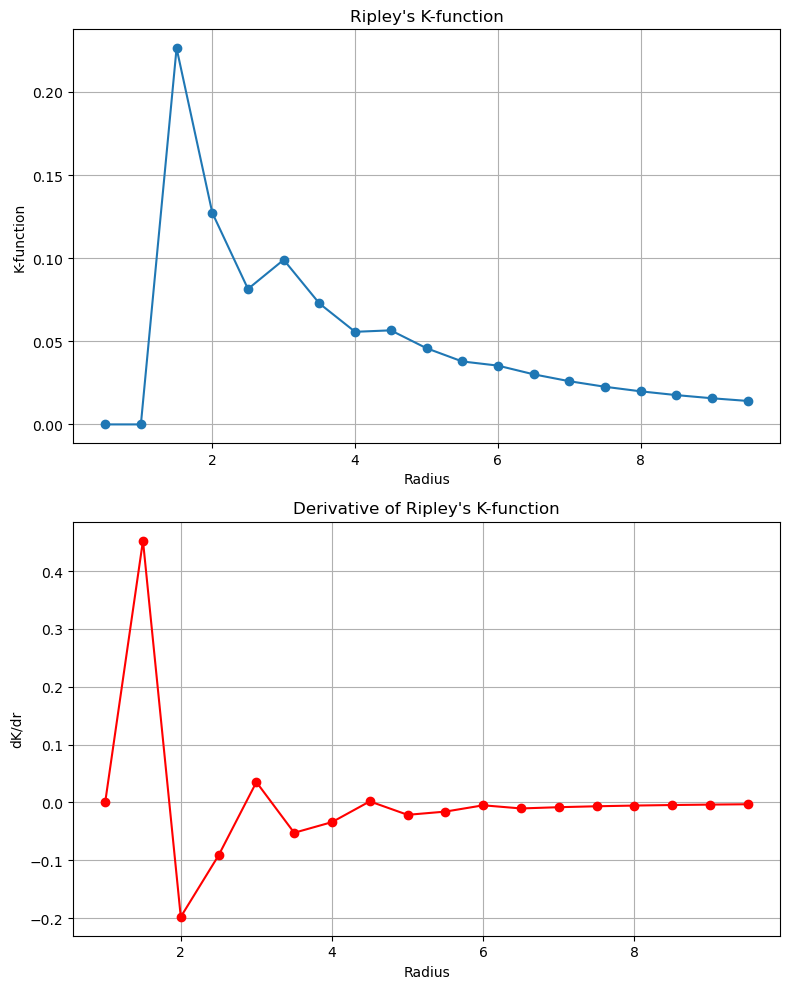

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

def ripley_k_function(points, r_max, step):
    """
    Calculate Ripley's K-function for a set of points.
    
    Parameters:
    points (numpy.ndarray): Array of point coordinates (n x 2).
    r_max (float): Maximum distance to consider.
    step (float): Step size for distance intervals.
    
    Returns:
    tuple: Arrays of distances and K-function values.
    """
    n = len(points)
    dists = distance_matrix(points, points)
    radii = np.arange(0, r_max, step)
    k_values = []

    for r in radii:
        count_within_r = np.sum(dists <= r, axis=1) - 1  # Subtract 1 to exclude self
        k_value = np.mean(count_within_r) / (np.pi * r**2)
        k_values.append(k_value)

    return radii, np.array(k_values)

def compute_derivative(radii, k_values):
    """
    Compute the derivative of Ripley's K-function.
    
    Parameters:
    radii (numpy.ndarray): Array of distances.
    k_values (numpy.ndarray): Array of K-function values.
    
    Returns:
    numpy.ndarray: Derivative of K-function.
    """
    # Calculate the difference between successive K-function values
    derivative = np.diff(k_values) / np.diff(radii)
    # Append the derivative at the end
    return derivative

# Example data: 2D points
points = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5]
])

# Parameters
r_max = 10  # Maximum distance to consider
step = 0.5   # Step size for distance intervals

# Compute Ripley's K-function
radii, k_values = ripley_k_function(points, r_max, step)

# Compute the derivative of Ripley's K-function
derivative = compute_derivative(radii, k_values)

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot K-function
ax1.plot(radii, k_values, marker='o')
ax1.set_xlabel('Radius')
ax1.set_ylabel('K-function')
ax1.set_title('Ripley\'s K-function')
ax1.grid(True)

# Plot derivative of K-function
ax2.plot(radii[1:], derivative, marker='o', color='r')
ax2.set_xlabel('Radius')
ax2.set_ylabel('dK/dr')
ax2.set_title('Derivative of Ripley\'s K-function')
ax2.grid(True)

plt.tight_layout()
plt.show()

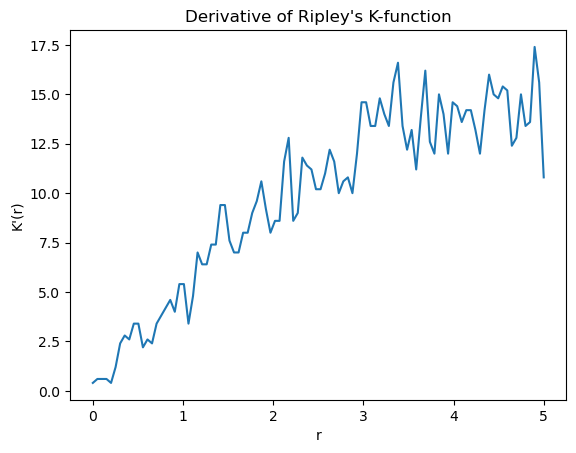

In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def ripley_k_derivative(points, r_values, window_area):
    """
    Calculate the derivative of Ripley's K-function for a set of points.
    
    Parameters:
    points (numpy.ndarray): An Nx2 array of point coordinates.
    r_values (numpy.ndarray): An array of distance values at which to evaluate the function.
    window_area (float): The area of the observation window.
    
    Returns:
    numpy.ndarray: The derivative of Ripley's K-function evaluated at each r value.
    """
    n_points = len(points)
    distances = squareform(pdist(points))
    
    k_values = np.zeros_like(r_values)
    for i, r in enumerate(r_values):
        k_values[i] = np.sum(distances <= r)
    
    k_values = (window_area / (n_points * (n_points - 1))) * k_values
    
    # Calculate the derivative using finite differences
    dk_dr = np.gradient(k_values, r_values)
    
    return dk_dr

# Example usage
if __name__ == "__main__":
    # Generate some random points
    np.random.seed(0)
    points = np.random.rand(100, 2) * 10
    
    # Define r values and window area
    r_values = np.linspace(0, 5, 100)
    window_area = 100  # 10x10 square
    
    # Calculate the derivative of Ripley's K-function
    k_derivative = ripley_k_derivative(points, r_values, window_area)
    
    # Plot the results
    import matplotlib.pyplot as plt
    plt.plot(r_values, k_derivative)
    plt.xlabel('r')
    plt.ylabel("K'(r)")
    plt.title("Derivative of Ripley's K-function")
    plt.show()